In [1]:
import numpy as np
import cv2

In [2]:
# im = cv2.imread('kuli_mask.png')
path = 'photo\p0\\'
im = cv2.imread(path+'s_p_mask.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,100,255,0)#findContours函数修改原图
#cv2.findContours()函数的三个参数,第一个是原图，第二个是轮廓获取方式，第三个是轮廓近似方法。
# img, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# im_smpl = cv2.imread('kuli_hmlSMPL.png')
im_smpl = cv2.imread(path+'hmlSMPL.png')
imgray_smpl = cv2.cvtColor(im_smpl,cv2.COLOR_BGR2GRAY)
ret_smpl,thresh_smpl = cv2.threshold(imgray_smpl,100,255,0)#findContours函数修改原图
# img_smpl, contours_smpl, hierarchy_smpl = cv2.findContours(thresh_smpl,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_smpl, contours_smpl, hierarchy_smpl = cv2.findContours(thresh_smpl,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [3]:
# 将点处理为便于使用的形式 nx2
contours = np.array(contours[0])
contours = contours.reshape(len(contours),2)
print(len(contours[:,0]))
contours_smpl = np.array(contours_smpl[0])
contours_smpl = contours_smpl.reshape(len(contours_smpl),2)
print(len(contours_smpl[:,0]))

845
797


In [4]:
contours

array([[28, 14],
       [28, 15],
       [29, 15],
       ...,
       [31, 15],
       [30, 15],
       [29, 14]], dtype=int32)

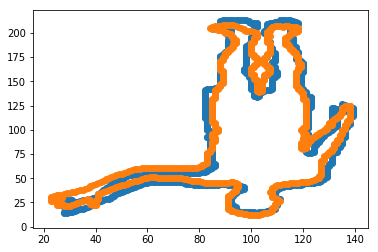

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# 画出散点图

i=1300

    
plt.scatter(contours[:i,0], contours[:i,1])

plt.scatter(contours_smpl[:i,0], contours_smpl[:i,1])
plt.show()

In [6]:
# np.save('contours.npy',contours )
# np.save('contours_smpl.npy',contours_smpl )
np.save(path+'small_contours.npy',contours )
np.save(path+'small_contours_smpl.npy',contours_smpl )

In [7]:
def get_contours(path):
    
    im = cv2.imread(path)
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,100,255,0)
    img, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    print( len(cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)))
    contours = np.array(contours[0])
    contours = contours.reshape(len(contours),2)
    return contours